## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load localisations and build histogram

Choose paths to load from and save to.

Note: For the higher magnification region of the 3D histogram in Curd et al, Nano Letters (2021), the 3D histogram was later cropped again in ImageJ and the reslice rotated correctly to match the cell orientation.

In [3]:
# ACTN2 Affimer
input_path = r'..\perpl_test_data\ACTN2-Affimer_locs_maxprec5.pkl'

locs = pd.read_pickle(input_path)
print(locs.columns)
# locs.columns

Index(['abovebg', 'counts', 'imagenum', 'numimages', 'qual', 'xpx', 'xuncorr',
       'ypx', 'yuncorr', 'zpx', 'zuncorr', 'xnm', 'ynm', 'znm',
       'photonsabovebg', 'precisionnm'],
      dtype='object')


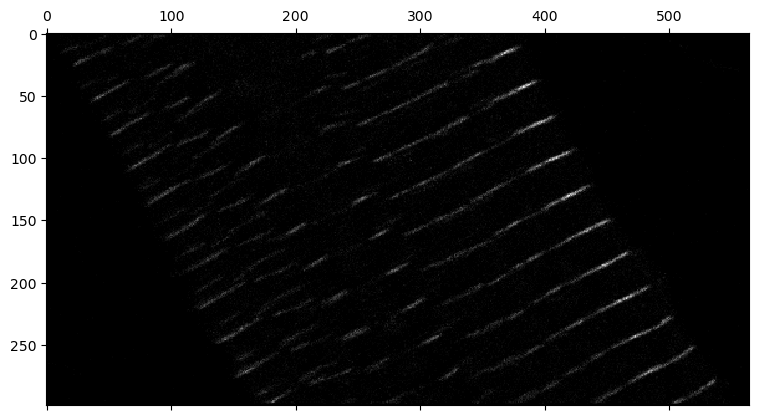

In [4]:
binsize = 50
edgex = np.arange(locs.xnm.min() - 1.5 * binsize, locs.xnm.max() + 2.5 * binsize, binsize)
edgey = np.arange(locs.ynm.min() - 1.5 * binsize,
                  locs.ynm.max() + 2.5 * binsize,
                  binsize)
hist_2d = np.histogram2d(locs.ynm, locs.xnm, bins=(edgey, edgex))[0]

plt.matshow(hist_2d, cmap='gray')

# Option to save as binary

In [ ]:
hist_2d.tofile(input_path[0:-4] + '_xyhist_' + repr(binsize) + 'nmbins_64bit_w{}_h{}.raw'.format(hist_2d.shape[1], hist_2d.shape[0]))
print('2D histogram shape = ' + repr(hist_2d.shape) + ' (columns, rows).')

## Contruct 3D histogram: Top right of lower-magnification XY view

In [ ]:
binsize = 5
edgex = np.arange(locs.xnm.median(),
                  locs.xnm.median() + (locs.xnm.max() - locs.xnm.median()) / 2,
                  binsize)
edgey = np.arange(locs.ynm.min(),
                  locs.ynm.min() + (locs.ynm.median() - locs.ynm.min()) / 2,
                  binsize)
edgez = np.arange(locs.znm.min(),
                  locs.znm.max(),
                  binsize)
hist3d = np.histogramdd(np.column_stack((locs.ynm, locs.xnm, locs.znm)), bins=(edgey, edgex, edgez))[0] # Re-order X and Y to match 2D histogram
hist3d = hist3d.astype(np.uint16)

plt.matshow(np.sum(hist3d, axis=2), cmap='gray')
print(hist3d.shape)

### Crop XY

In [ ]:
hist3d_crop = hist3d[0:600, 300:1000, :]
plt.matshow(np.sum(hist3d_crop, axis=2), cmap='gray')

### Show XZ

In [ ]:
plt.matshow(np.transpose(np.sum(hist3d_crop, axis=0)), cmap='gray')

### Option to save as binary

In [ ]:
# Re-order so that Z saves first, then vertical, then horizontal, as displayed above
hist3d_transposed = np.transpose(hist3d_crop, (2, 0, 1))
# Save
hist3d_transposed.tofile(input_path[0:-4] + '_3dhist_' + repr(binsize) + 'nmbins_uint16bit_w{}_h{}_d{}.raw'.format(
    hist3d_transposed.shape[2], hist3d_transposed.shape[1], hist3d_transposed.shape[0])
                        )

In [ ]:
print('3D histogram shape = ' + repr(hist3d_transposed.shape) + ' (depth, height, width).')